In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv('multi_crop_disease_dataset_20000_rows.csv')
df.head()

,Crop,Disease,Temperature(C),Humidity(%),Rainfall(mm),Soil_pH,Soil_Moisture(%),Leaf_Spots,Wilting
0,Apple,Apple Scab,27.5,47,239,7.5,17,1,1
1,Groundnut,Tikka Disease,38.4,48,275,8.1,66,1,1
2,Maize,Downy Mildew,40.7,47,164,6.6,41,1,0
3,Mango,Anthracnose,16.0,80,295,7.1,87,1,1
4,Potato,Early Blight,24.7,56,146,7.0,45,1,1


In [34]:
df.shape

(20000, 9)

In [35]:
df.isnull().sum()

Crop                0
Disease             0
Temperature(C)      0
Humidity(%)         0
Rainfall(mm)        0
Soil_pH             0
Soil_Moisture(%)    0
Leaf_Spots          0
Wilting             0
dtype: int64

In [36]:
df.describe()

,Temperature(C),Humidity(%),Rainfall(mm),Soil_pH,Soil_Moisture(%),Leaf_Spots,Wilting
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,30.09494,62.543600,200.656600,6.509255,49.619500,0.55650,0.480100
std,8.70943,19.087711,115.776756,0.981898,23.233005,0.49681,0.499616
min,15.00000,30.000000,0.000000,4.800000,10.000000,0.00000,0.000000
25%,22.60000,46.000000,101.000000,5.700000,30.000000,0.00000,0.000000
50%,30.20000,62.000000,201.000000,6.500000,50.000000,1.00000,0.000000
75%,37.70000,79.000000,301.000000,7.400000,70.000000,1.00000,1.000000
max,45.00000,95.000000,400.000000,8.200000,90.000000,1.00000,1.000000


In [37]:
df.columns

Index(['Crop', 'Disease', 'Temperature(C)', 'Humidity(%)', 'Rainfall(mm)',
       'Soil_pH', 'Soil_Moisture(%)', 'Leaf_Spots', 'Wilting'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crop              20000 non-null  object 
 1   Disease           20000 non-null  object 
 2   Temperature(C)    20000 non-null  float64
 3   Humidity(%)       20000 non-null  int64  
 4   Rainfall(mm)      20000 non-null  int64  
 5   Soil_pH           20000 non-null  float64
 6   Soil_Moisture(%)  20000 non-null  int64  
 7   Leaf_Spots        20000 non-null  int64  
 8   Wilting           20000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.4+ MB


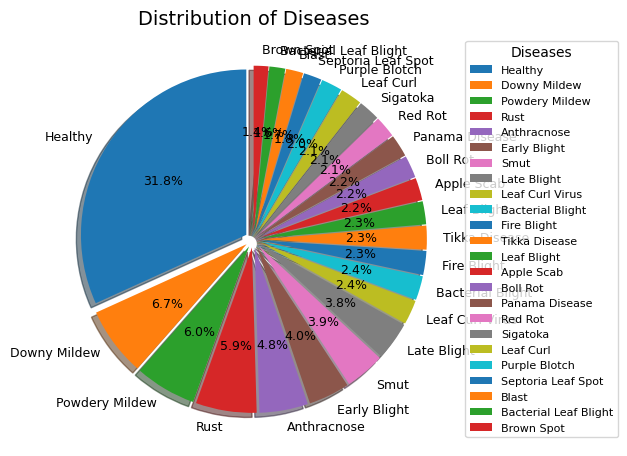

In [39]:
disease_counts = df['Disease'].value_counts()
disease_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,      # Start angle of the pie
    shadow=True,        # Add shadow for better visualization
    explode=[0.05] * len(disease_counts),  # Slightly explode all slices
    textprops={'fontsize': 9}  # Reduce text size
)

# Add a title
plt.title('Distribution of Diseases', fontsize=14)

# Remove the y-label (which is usually unnecessary for pie charts)
plt.ylabel('')

# Adjust the legend to prevent overlap
plt.legend(
    title='Diseases',
    loc='center left',     # Position the legend to the left
    bbox_to_anchor=(1, 0.5),  # Place it outside the pie
    fontsize=8
)

# Ensure the layout is tight
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='Disease'>

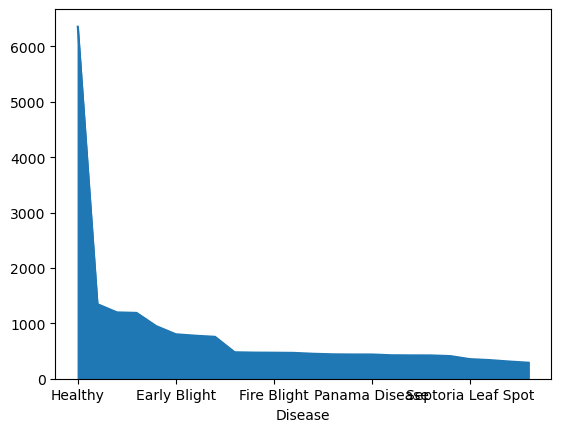

In [40]:
df['Disease'].value_counts().plot(kind='area')

In [41]:
df_encoder=pd.get_dummies(df,drop_first=True)
df_encoder.head()

,Temperature(C),Humidity(%),Rainfall(mm),Soil_pH,Soil_Moisture(%),Leaf_Spots,Wilting,Crop_Banana,Crop_Chilli,Crop_Cotton,...,Disease_Leaf Curl Virus,Disease_Panama Disease,Disease_Powdery Mildew,Disease_Purple Blotch,Disease_Red Rot,Disease_Rust,Disease_Septoria Leaf Spot,Disease_Sigatoka,Disease_Smut,Disease_Tikka Disease
0,27.5,47,239,7.5,17,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,38.4,48,275,8.1,66,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,40.7,47,164,6.6,41,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,80,295,7.1,87,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,24.7,56,146,7.0,45,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df_encoder=df_encoder.astype(int)

In [53]:
df_encoder.head()

,Temperature(C),Humidity(%),Rainfall(mm),Soil_pH,Soil_Moisture(%),Leaf_Spots,Wilting,Crop_Banana,Crop_Chilli,Crop_Cotton,...,Disease_Leaf Curl Virus,Disease_Panama Disease,Disease_Powdery Mildew,Disease_Purple Blotch,Disease_Red Rot,Disease_Rust,Disease_Septoria Leaf Spot,Disease_Sigatoka,Disease_Smut,Disease_Tikka Disease
0,27,47,239,7,17,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,48,275,8,66,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,40,47,164,6,41,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,80,295,7,87,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,56,146,7,45,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_encoder.columns

Index(['Temperature(C)', 'Humidity(%)', 'Rainfall(mm)', 'Soil_pH',
       'Soil_Moisture(%)', 'Leaf_Spots', 'Wilting', 'Crop_Banana',
       'Crop_Chilli', 'Crop_Cotton', 'Crop_Grapes', 'Crop_Groundnut',
       'Crop_Maize', 'Crop_Mango', 'Crop_Onion', 'Crop_Potato', 'Crop_Rice',
       'Crop_Soybean', 'Crop_Sugarcane', 'Crop_Tomato', 'Crop_Wheat',
       'Disease_Apple Scab', 'Disease_Bacterial Blight',
       'Disease_Bacterial Leaf Blight', 'Disease_Blast', 'Disease_Boll Rot',
       'Disease_Brown Spot', 'Disease_Downy Mildew', 'Disease_Early Blight',
       'Disease_Fire Blight', 'Disease_Healthy', 'Disease_Late Blight',
       'Disease_Leaf Blight', 'Disease_Leaf Curl', 'Disease_Leaf Curl Virus',
       'Disease_Panama Disease', 'Disease_Powdery Mildew',
       'Disease_Purple Blotch', 'Disease_Red Rot', 'Disease_Rust',
       'Disease_Septoria Leaf Spot', 'Disease_Sigatoka', 'Disease_Smut',
       'Disease_Tikka Disease'],
      dtype='object')

In [55]:
df["Temp_Humidity_Index"] = df["Temperature(C)"] * df["Humidity(%)"]
df["Rain_Moisture_Index"] = df["Rainfall(mm)"] * df["Soil_Moisture(%)"]
df["Stress_Index"] = df["Temperature(C)"] / (df["Humidity(%)"] + 1)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# Define disease columns
disease_columns = [col for col in df_encoder.columns if 'Disease_' in col]

# Features (X) will be everything except the disease columns
X = df_encoder.drop(disease_columns, axis=1)

# Target (y) will be the disease columns
# If you want to predict which disease is present:

y = df_encoder[disease_columns].idxmax(axis=1).str.replace('Disease_', '')

In [58]:
X

,Temperature(C),Humidity(%),Rainfall(mm),Soil_pH,Soil_Moisture(%),Leaf_Spots,Wilting,Crop_Banana,Crop_Chilli,Crop_Cotton,...,Crop_Groundnut,Crop_Maize,Crop_Mango,Crop_Onion,Crop_Potato,Crop_Rice,Crop_Soybean,Crop_Sugarcane,Crop_Tomato,Crop_Wheat
0,27,47,239,7,17,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,48,275,8,66,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,40,47,164,6,41,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16,80,295,7,87,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,24,56,146,7,45,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,35,33,138,8,74,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19996,42,80,227,5,16,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19997,42,68,42,4,33,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19998,35,63,129,4,58,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
scaler=StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.fit_transform(X_test)

In [61]:
models ={
    "Logistic Regression" :LogisticRegression(),
    "KNN" :KNeighborsClassifier(),
    "Naive_bayes" :GaussianNB(),
    "Decision_Tree" :DecisionTreeClassifier(),
    "SVM" :SVC()
}

In [62]:
result = []

for name, model in models.items():
    model.fit(X_train_Scaled, y_train)
    y_pred = model.predict(X_test_Scaled)
    acc = accuracy_score(y_test, y_pred)
    # Specify an averaging method for multiclass classification
    # Common options: 'micro', 'macro', 'weighted'
    f1 = f1_score(y_test, y_pred, average='weighted')  # Changed to use weighted average
   
    result.append({
        "model": name,
        "Accuracy": round(acc, 4),
        "f1 score": round(f1, 4),
    })

# Display results
result_df = pd.DataFrame(result)
result_df  # This will display the results in a table format

,model,Accuracy,f1 score
0,Logistic Regression,0.5317,0.5224
1,KNN,0.5098,0.5028
2,Naive_bayes,0.3172,0.1528
3,Decision_Tree,0.4680,0.4696
4,SVM,0.5292,0.5124
